<a href="https://colab.research.google.com/github/raj911tx/housingprice/blob/master/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this project we are trying to predict housing prices in King Country from kaggle dataset.This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

[house sales in king Country](https://www.kaggle.com/harlfoxem/housesalesprediction)

install kaggle api by running this command

In [0]:
from google.colab import files
!pip install -q kaggle

In [0]:
uploaded=files.upload()

Saving kaggle.json to kaggle (1).json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


Now download the dataset by running this command

In [0]:
!kaggle datasets download -d harlfoxem/housesalesprediction

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 52.8MB/s]


In [0]:
!ls
!unzip -q housesalesprediction.zip
!rm housesalesprediction.zip

 housesalesprediction.zip   kaggle.json         sample_data
'kaggle (1).json'	    kc_house_data.csv
replace kc_house_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


Now after unzipping the file we now see the .csv file 

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The column names are follows:

In [0]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Now we check if there is any missing value in columns

In [0]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## Now we visualize different columns to get intuition about their importance

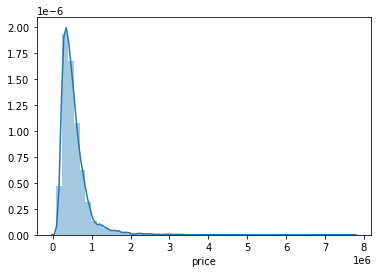

In [0]:
sns.distplot(df['price'])

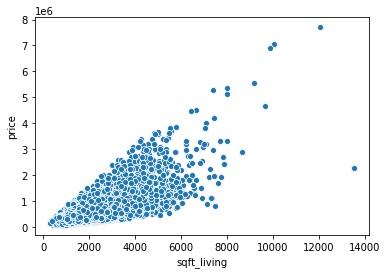

In [0]:
sns.scatterplot(x='sqft_living',y='price',data=df)

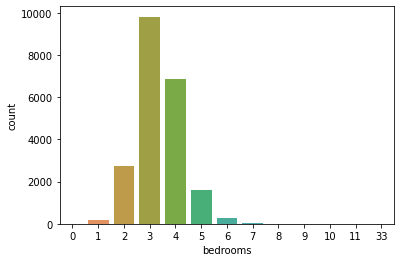

In [0]:
sns.countplot(x='bedrooms',data=df)

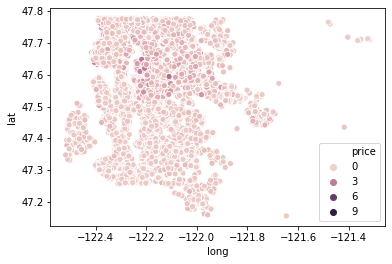

In [0]:
sns.scatterplot(x='long',y='lat',hue='price',data=df)

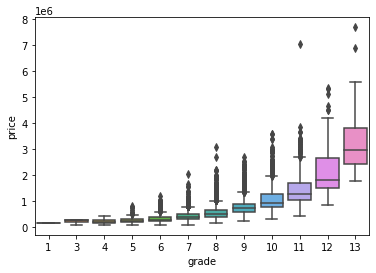

In [0]:
sns.boxplot(x='grade',y='price',data=df)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [0]:
df=df.drop('id',axis=1)

In [0]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Now we convert the date column to datetime format

In [0]:
df['date']=pd.to_datetime(df['date'])

In [0]:
df['month']=df['date'].apply(lambda x:x.month)
df['year']=df['date'].apply(lambda x:x.year)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [0]:
df=df.drop('date',axis=1)
df.drop('zipcode',axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


## Now we scale and normalize the data using scikitlearn library

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df = scaler.fit_transform(df)

## Now we split the data into train-test parts

In [0]:
x=df.drop('price',axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
xTrain.shape

(17290, 20)

## Now we us tensorflow framework to create nural network model

In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
def model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(xTrain.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [0]:
model=model()

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS = 400

history = model.fit(
  xTrain, yTrain,
  epochs=EPOCHS, validation_split = 0.2, verbose=2,
  batch_size=256)

Epoch 1/400
55/55 - 0s - loss: 407170973696.0000 - mae: 513369.0000 - mse: 407170973696.0000 - val_loss: 275891290112.0000 - val_mae: 395025.7812 - val_mse: 275891290112.0000
Epoch 2/400
55/55 - 0s - loss: 176309288960.0000 - mae: 264887.2500 - mse: 176309288960.0000 - val_loss: 122537631744.0000 - val_mae: 220625.9219 - val_mse: 122537631744.0000
Epoch 3/400
55/55 - 0s - loss: 140108431360.0000 - mae: 233214.0625 - mse: 140108431360.0000 - val_loss: 117840814080.0000 - val_mae: 224749.5000 - val_mse: 117840814080.0000
Epoch 4/400
55/55 - 0s - loss: 137476718592.0000 - mae: 232329.2656 - mse: 137476718592.0000 - val_loss: 116380688384.0000 - val_mae: 228739.9375 - val_mse: 116380688384.0000
Epoch 5/400
55/55 - 0s - loss: 135566934016.0000 - mae: 230620.5625 - mse: 135566934016.0000 - val_loss: 114446680064.0000 - val_mae: 227401.8438 - val_mse: 114446680064.0000
Epoch 6/400
55/55 - 0s - loss: 133092065280.0000 - mae: 229781.5312 - mse: 133092065280.0000 - val_loss: 112017244160.0000 - 

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
395,5.053047e+10,149030.406250,5.053047e+10,5.184745e+10,145228.218750,5.184745e+10,395
396,5.066346e+10,149155.828125,5.066346e+10,5.161262e+10,148992.015625,5.161262e+10,396
397,5.074748e+10,149450.406250,5.074748e+10,5.239053e+10,145097.406250,5.239053e+10,397
398,5.082851e+10,149436.296875,5.082851e+10,5.178893e+10,144830.515625,5.178893e+10,398
399,5.020418e+10,148393.343750,5.020418e+10,5.181609e+10,148420.062500,5.181609e+10,399


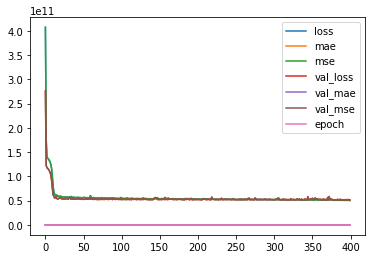

In [0]:
hist.plot()

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [0]:
preds = model.predict(xTest)

In [0]:
mean_absolute_error(yTest,preds)

147297.99726390815

In [0]:
np.sqrt(mean_squared_error(yTest,preds))

217747.6516685942

In [0]:
explained_variance_score(yTest,preds)

0.6024991268394141

In [0]:
r2_score(yTest,preds)

0.601308966726411

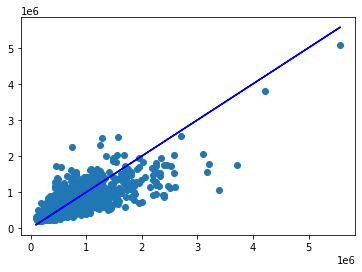

In [0]:
plt.scatter(yTest,preds)
plt.plot(yTest,yTest,color='blue')

In [0]:
errors = yTest.values.reshape(len(yTest),1)-preds

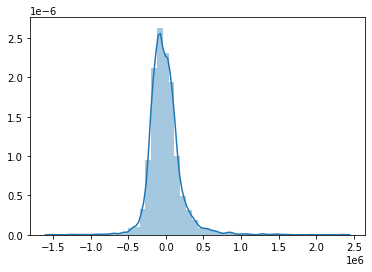

In [0]:
sns.distplot(errors)